In [1]:
%pylab notebook
try:
    from oiutils import oifits, oimodels, tellcorr, dpfit, oicandid
except:
    import sys
    sys.path = ['../oiutils'] + sys.path
    import oifits, oimodels, tellcorr, dpfit, oicandid

import os
from astropy.io import fits
import ipywidgets as widgets

from importlib import reload

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Populating the interactive namespace from numpy and matplotlib


In [3]:
reload(oifits)
data = oifits.loadOI('AXCir.oifits')
merged = oifits.mergeOI([data], allInOne=1)

loadOI: loading AXCir.oifits
  > insname: "PIONIER_Pnat(1.6135391/1.7698610)" targname: "AX_CIR"
  > MJD: [56487.97305633923, 56487.97393179347, 56487.97480311718, 56487.97567612686, 56487.97654849956, 56487.98993815819, 56487.990812632524, 56487.99168235045, 56487.992556167876, 56487.993429625145, 56488.00573612476, 56488.006608098876, 56488.00747989074, 56488.008355897415, 56488.009225301685, 56488.01009631798, 56488.01097278044, 56488.01184104877, 56488.01271335528, 56488.01359114645, 56488.03308009381, 56488.033590092076, 56488.034099806384, 56488.034609943774, 56488.035122056725, 56488.03563601018, 56488.03614173218, 56488.03664971952, 56488.0371620554, 56488.037670965175, 56488.04667515908, 56488.047189387165, 56488.04770007059, 56488.04821183202, 56488.04872313115, 56488.04923333806, 56488.04974387007, 56488.05025742777, 56488.05077371096, 56488.05128556907, 56488.0586200955, 56488.059128990484, 56488.059639380604, 56488.060149933954, 56488.060659175615, 56488.06116582593, 56488

In [18]:
merged[0]['OI_VIS2']['all']['EV2'].shape

(300, 3)

<IPython.core.display.Javascript object>


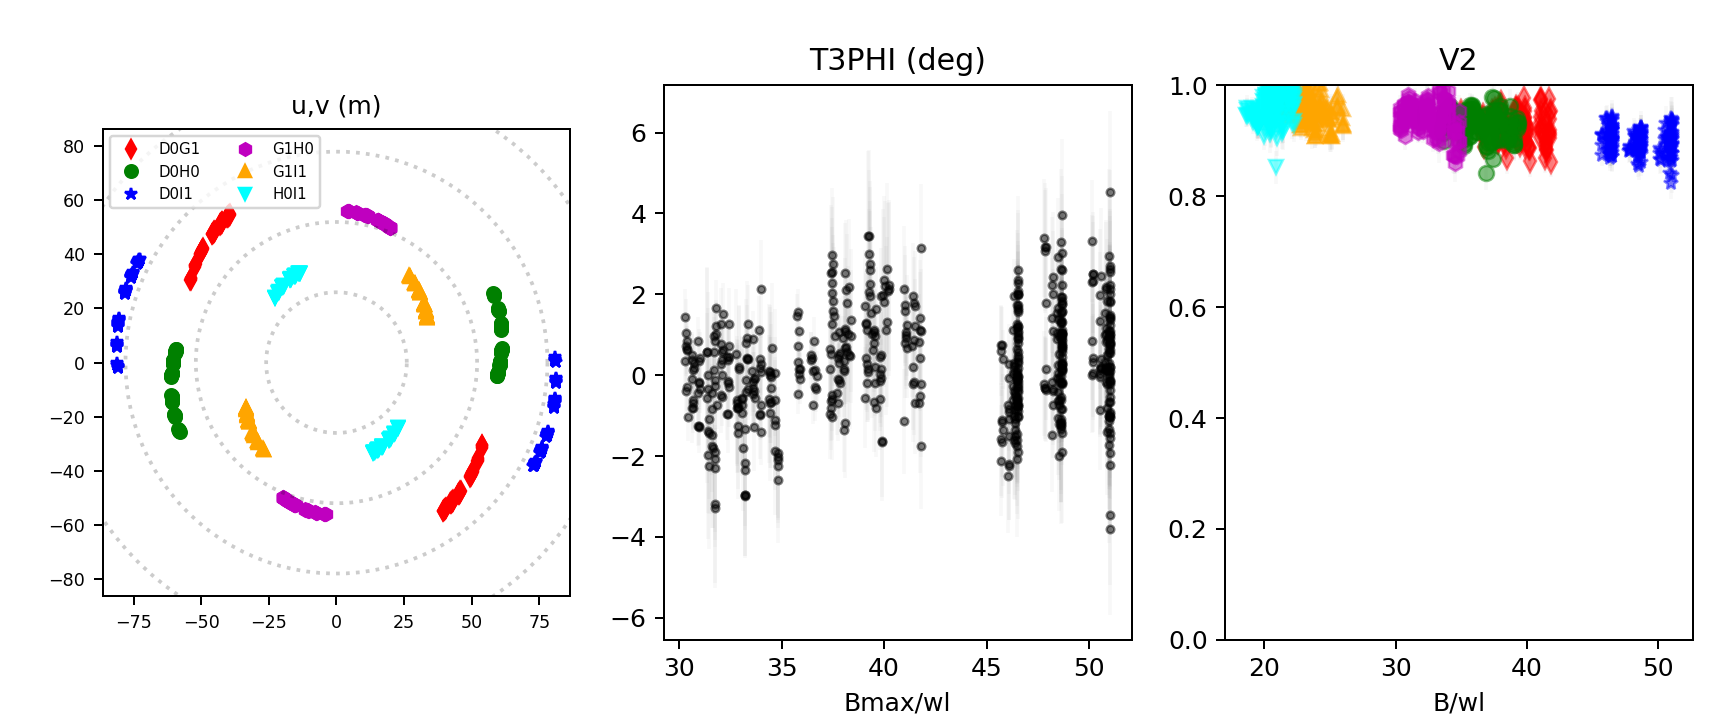

In [23]:
reload(oimodels)
oimodels.showOI(data, allInOne=1, showUV=1)

<IPython.core.display.Javascript object>


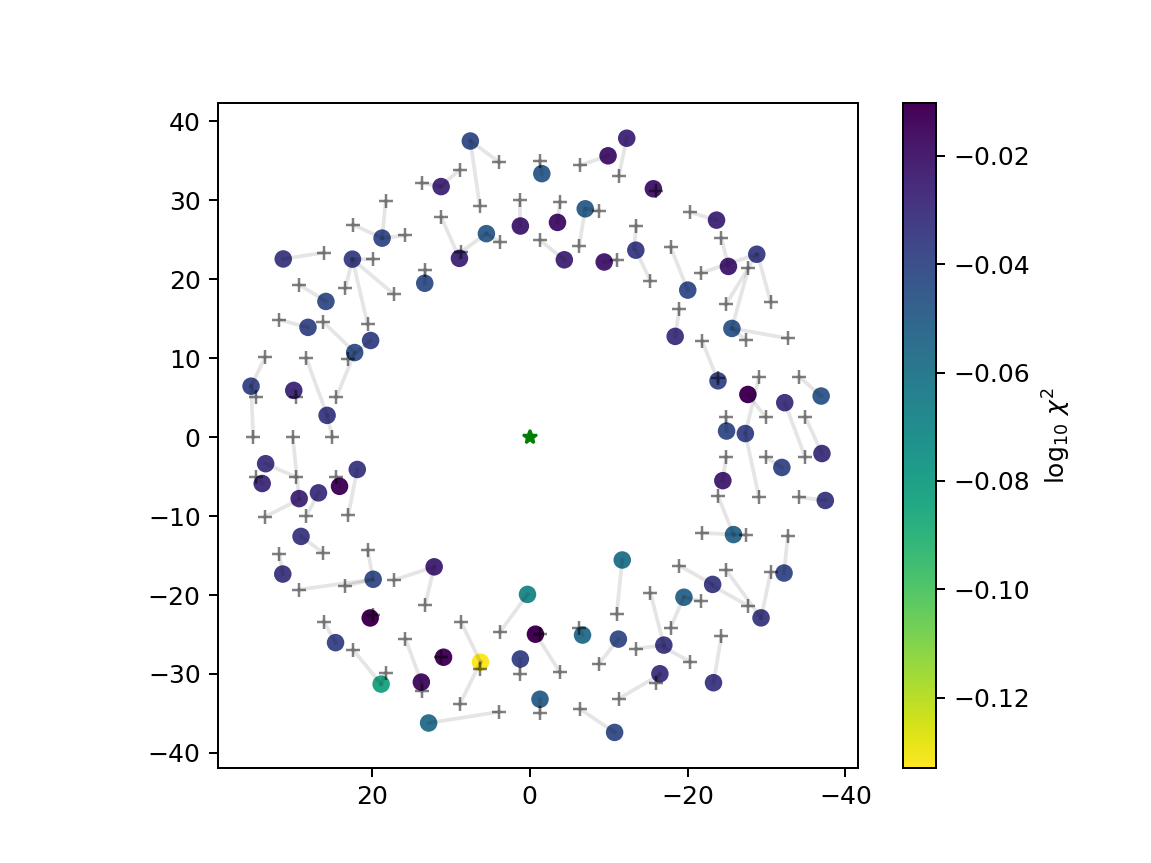

running 111 fits...
initial estimate: 88.4 fit per minute using 4 threads (679ms per fit)
6.198883056640625e-05
it took 17.8s, 375 fit per minute on average (160ms per fit)
111 minima -> 74 unique solutions


In [34]:
reload(oimodels)
reload(oicandid)
data['fit'] = {'obs':['V2', 'T3PHI']}

for m in merged:
    m['fit'] = {'obs':['V2', 'T3PHI']}

#fm = oicandid.fitMap(data, rmin=24, rmax=36, rstep=3, firstGuess={'c,f':0.05, '*,ud':0.5}, fitAlso=['*,ud'])
fm = oicandid.fitMap(data, rmin=25, rmax=35, rstep=5, firstGuess={'c,f':0.05, '*,ud':0.5}, fitAlso=['*,ud'])
#fm = oicandid.fitMap(merged, rmin=10, rmax=40, rstep=4, firstGuess={'c,f':0.05, '*,ud':0.5}, fitAlso=['*,ud'])

In [12]:
fm[0]['best']

{'*,f': 1.0,
 '*,ud': 0.83048539877347527,
 'c,f': 0.0083310918196831188,
 'c,ud': 0.0,
 'c,x': 6.2218838743913851,
 'c,y': -28.502445507866412}

In [6]:
reload(oimodels)
for i in range(10):
    m = oimodels.VmodelOI(data, {'*,ud':0, '*,f':1.0, 'c,ud':0, 'c,x':2, 'c,y':5, 'c,f':0.1}, timeit=0)
m = oimodels.VmodelOI(data, {'*,ud':0, '*,f':1.0, 'c,ud':0, 'c,x':2, 'c,y':5, 'c,f':0.1}, timeit=1)

 VsingleOI > spectrum 0.024ms
 VsingleOI > setup 0.053ms
 VsingleOI > complex vis 0.296ms
VmodelOI > VsingleOI "*" 0.587ms
 VsingleOI > spectrum 0.023ms
 VsingleOI > setup 0.047ms
 VsingleOI > complex vis 0.369ms
VmodelOI > VsingleOI "c" 0.747ms
VmodelOI > fluxes 0.216ms
VmodelOI > T3 0.333ms
VmodelOI > total 1.957ms
